In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random

In [38]:
def get_uniform_splitting(a,b,n):
    x_points = []
    for i in range(n):
        x_points.append(a+(b-a)/(n-1) * i)
    return x_points
        
def get_f_points(f, x_points):
    f_points = []
    for x in x_points:
        f_points.append(f(x))
    return f_points

def get_K_points(K, x_points, s_points):
    K_points = []
    for x in x_points:
        x_line = []
        for s in s_points:
            x_line.append(K(x,s))
        K_points.append(x_line)
    return K_points

In [39]:
def quadrature_tr(lam,K,f,a,b,n,x_points):
    M = []
    s_points = get_uniform_splitting(a,b,n)
    K_points = get_K_points(K, x_points, s_points)
    h = (b-a)/n
    for i in range(len(x_points)):
        M_line = []
        for j in range(len(s_points)):
            if j == 0 or j == (n-1):
                Aj = 1/2
            else:
                Aj = 1
            Mij = h*lam*Aj*K_points[i][j]
            if i == j:
                Mij = Mij+1
            M_line.append(Mij)
        M.append(M_line)
    return M

def quadrature_sim(lam,K,f,a,b,n,x_points):
    M = []
    s_points = get_uniform_splitting(a,b,n)
    K_points = get_K_points(K, x_points, s_points)
    h = (b-a)/n
    for i in range(len(x_points)):
        M_line = []
        for j in range(len(s_points)):
            if j == 0 or j == (n-1):
                Aj = 1/2
            elif j%2==0:
                Aj = 2
            else: Aj=4
            Mij = h/3*lam*Aj*K_points[i][j]
            if i == j:
                Mij = Mij+1
            M_line.append(Mij)
        M.append(M_line)
    return M

In [40]:
def get_error_norm(f_points, f_int_points):
    errors = []
    for i in range(len(f_points)):
        errors.append(np.abs(f_points[i] - f_int_points[i]))
    return np.max(errors)

In [41]:
def plot(x,f):
    plt.scatter(x,f)
    
def plot_with_ac_solve(x, f_ac, f):
    plt.plot(x, f_ac, label='f_ac')
    plt.plot(x, f, label='f')

def solve_equation_tr(lam, K, f, a, b, n):
    x_points = get_uniform_splitting(a,b,n)
    M = quadrature_tr(lam,K,f,a,b,n,x_points)
    f_points = get_f_points(f, x_points)
    y_points = np.linalg.solve(M, f_points)
    return y_points

def solve_equation_sim(lam, K, f, a, b, n):
    x_points = get_uniform_splitting(a,b,n)
    M = quadrature_sim(lam,K,f,a,b,n,x_points)
    f_points = get_f_points(f, x_points)
    y_points = np.linalg.solve(M, f_points)
    return y_points

In [42]:
splitting = 150

In [43]:
def tabulate_tr(lam, K, f, a, b, f_ac):
    errors = []
    ns = []
    for n in range(20, 601, 20):
        y = solve_equation_tr(lam, K, f, a, b,n)
        f_ac_points = get_f_points(f_ac, get_uniform_splitting(a,b,n))
        error = get_error_norm(y,f_ac_points)
        print("n= ", n, " error= ", error)
        ns.append(n)
        errors.append(error)
    plt.plot(ns,errors)
        
def tabulate_sim(lam, K, f, a, b, f_ac):
    errors = []
    ns = []
    for n in range(20, 601, 20):
        y = solve_equation_sim(lam, K, f, a, b,n)
        f_ac_points = get_f_points(f_ac, get_uniform_splitting(a,b,n))
        error = get_error_norm(y,f_ac_points)
        print("n= ", n, " error= ", error)
        ns.append(n)
        errors.append(error)
    plt.plot(ns,errors)

n=  20  error=  0.15616618773866486
n=  40  error=  0.07660606883474363
n=  60  error=  0.05072186481305163
n=  80  error=  0.037908168923140195
n=  100  error=  0.03026201326877276
n=  120  error=  0.025182308945953746
n=  140  error=  0.02156269622283391
n=  160  error=  0.01885279346819413
n=  180  error=  0.016747949651117366
n=  200  error=  0.015065880049045521
n=  220  error=  0.013690837411578283
n=  240  error=  0.012545792236883901
n=  260  error=  0.011577493516958803
n=  280  error=  0.010747950960203756
n=  300  error=  0.010029333789117079
n=  320  error=  0.00940078749542872
n=  340  error=  0.008846376872482242
n=  360  error=  0.008353716311105153
n=  380  error=  0.007913033597226615
n=  400  error=  0.0075165151663538765
n=  420  error=  0.007157838807140493
n=  440  error=  0.00683183405646437
n=  460  error=  0.006534231351563058
n=  480  error=  0.006261474006016954
n=  500  error=  0.00601057538874894
n=  520  error=  0.005779009116202438
n=  540  error=  0.00556

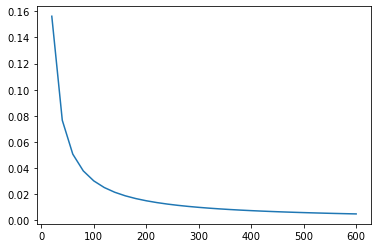

In [44]:
tabulate_tr(3, lambda x, y: np.sin(x-2*y), lambda x: 2, 0, np.pi/2, lambda x: 2-3*np.sin(x))

n=  20  error=  0.4159049501078491
n=  40  error=  0.18928742892359862
n=  60  error=  0.12243822007050298
n=  80  error=  0.09047130505014644
n=  100  error=  0.07173786210287858
n=  120  error=  0.05943064811624277
n=  140  error=  0.05072745473391205
n=  160  error=  0.04424749930689442
n=  180  error=  0.03923542630385102
n=  200  error=  0.03524323403625651
n=  220  error=  0.03198838736818255
n=  240  error=  0.029283885341671922
n=  260  error=  0.027001030724594255
n=  280  error=  0.02504835102330638
n=  300  error=  0.02335904764099972
n=  320  error=  0.021883202171256055
n=  340  error=  0.020582761247504244
n=  360  error=  0.019428209095721627
n=  380  error=  0.018396300384214914
n=  400  error=  0.01746847907755056
n=  420  error=  0.016629752754163007
n=  440  error=  0.015867876334156428
n=  460  error=  0.01517275034433263
n=  480  error=  0.014535970698128953
n=  500  error=  0.01395048727419601
n=  520  error=  0.01341034180738232
n=  540  error=  0.012910464398586

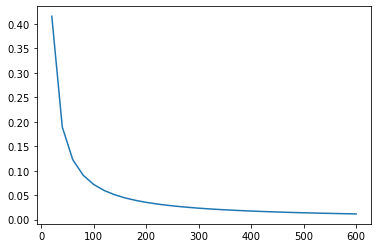

In [45]:
tabulate_sim(3, lambda x, y: np.sin(x-2*y), lambda x: 2, 0, np.pi/2, lambda x: 2-3*np.sin(x))

n=  20  error=  0.2588839836627672
n=  40  error=  0.1325991135833693
n=  60  error=  0.08912399437570517
n=  80  error=  0.06711806983849655
n=  100  error=  0.0538273629397823
n=  120  error=  0.04493027815634676
n=  140  error=  0.03855718905615202
n=  160  error=  0.033767476129924034
n=  180  error=  0.030036263297888333
n=  200  error=  0.027047580382673075
n=  220  error=  0.024599835551668114
n=  240  error=  0.022558355422892085
n=  260  error=  0.02082974581194197
n=  280  error=  0.019347201626037425
n=  300  error=  0.018061673278793933
n=  320  error=  0.016936335379808654
n=  340  error=  0.015943001926443934
n=  360  error=  0.015059733121656649
n=  380  error=  0.014269195949919045
n=  400  error=  0.01355751535390759
n=  420  error=  0.012913452866782471
n=  440  error=  0.012327808745847157
n=  460  error=  0.011792979733010966
n=  480  error=  0.011302627145362898
n=  500  error=  0.010851424464905612
n=  520  error=  0.010434863065101219
n=  540  error=  0.010049101

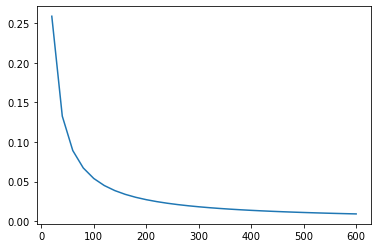

In [46]:
tabulate_tr(-1/2, lambda x, y: np.exp(x-y), lambda x: np.exp(x), 0, 1, lambda x: 2*np.exp(x))

n=  20  error=  0.4181972043783153
n=  40  error=  0.21746254627672457
n=  60  error=  0.1469341528896786
n=  80  error=  0.11095027871261287
n=  100  error=  0.08912399437570606
n=  120  error=  0.07447347475230348
n=  140  error=  0.0639595724343307
n=  160  error=  0.05604704800946614
n=  180  error=  0.04987673079741306
n=  200  error=  0.04493027815634498
n=  220  error=  0.04087641847307033
n=  240  error=  0.03749354246150283
n=  260  error=  0.03462779399311078
n=  280  error=  0.032169015721412286
n=  300  error=  0.03003626329788922
n=  320  error=  0.028168723610974666
n=  340  error=  0.026519822716674746
n=  360  error=  0.025053288741553992
n=  380  error=  0.02374045265028979
n=  400  error=  0.02255835542289386
n=  420  error=  0.02148839390086099
n=  440  error=  0.020515334554412235
n=  460  error=  0.01962658359897862
n=  480  error=  0.018811638951267362
n=  500  error=  0.018061673278793933
n=  520  error=  0.017369212961400038
n=  540  error=  0.01672788817513471


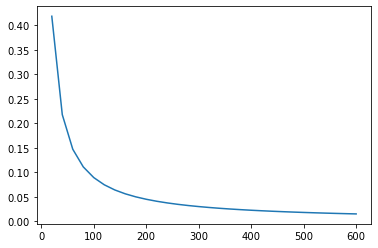

In [47]:
tabulate_sim(-1/2, lambda x, y: np.exp(x-y), lambda x: np.exp(x), 0, 1, lambda x: 2*np.exp(x))